In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [69]:
from utils import *

### Create graph from SBM

In [3]:
# Design the preference matrix
#http://www.princeton.edu/~eabbe/publications/ITsoc_CD1.pdf

In [4]:
p_out, p_in = 0.01, 0.9  
block_sizes = 4 * [20]
n_nodes = 4*20

In [5]:
gr = simple_SBM(n_nodes, block_sizes, p_in, p_out)
adjency = get_np_adjency_matrix(gr)
#adjency = np.random.shuffle(adjency)
#clusters = 20*[0] + 20*[1] + 20*[2]

In [6]:
clusters = spectral_clustering(adjency, 4, laplacian_normalization=None)

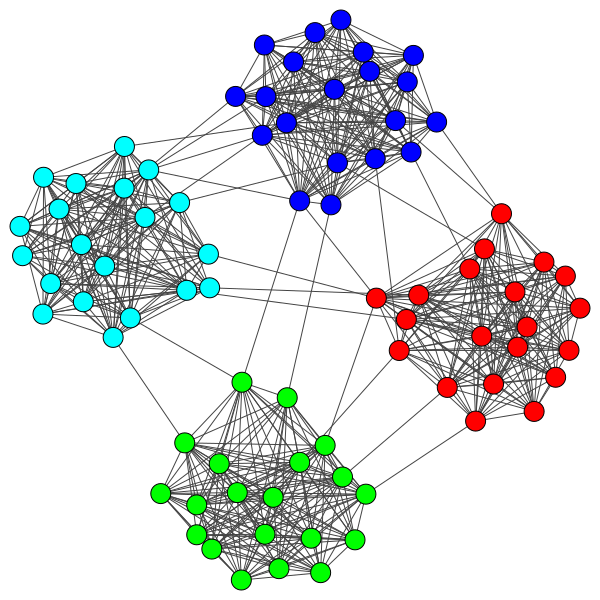

In [7]:
plot_communities_array(adjency_matrix=adjency, communities=clusters)

## Test clustering on real data

### Data on graph

In [8]:
graph_path = '../data/dolphins.gml'

In [9]:
gr = igraph.Graph.Read_GML(graph_path)

In [10]:
adjency = get_np_adjency_matrix(gr)

In [11]:
clusters1 = clustering_from_adjency(A=adjency, nb_clusters=2)
clusters2 = spectral_clustering(A=adjency, nb_clusters=2, laplacian_normalization=None)

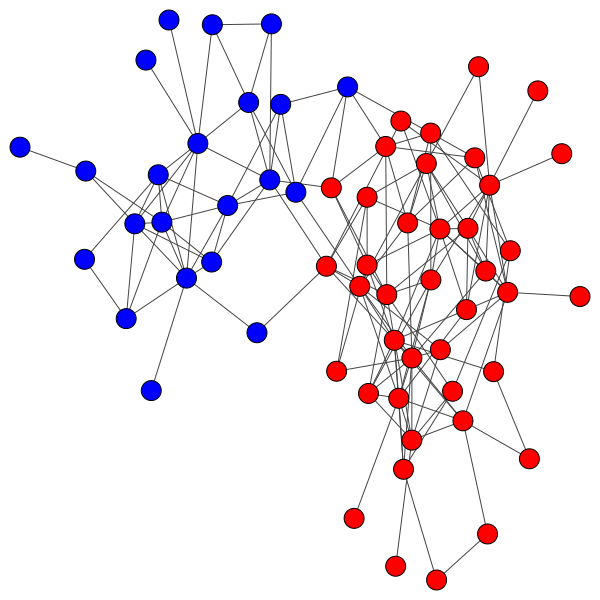

In [12]:
plot_communities_array(adjency, clusters1)

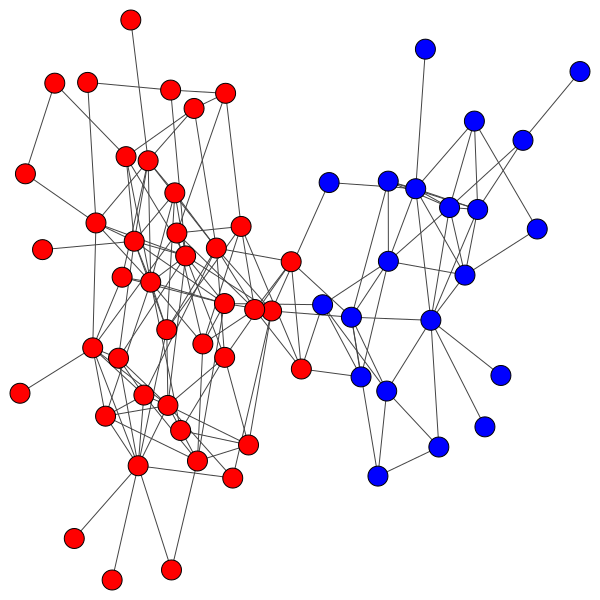

In [13]:
plot_communities_array(adjency, clusters2)

In [14]:
import community
import networkx as nx

In [15]:
part1 = dict()
for (node, assignement) in zip(range(0, adjency.shape[0]), clusters1):
    part1[node] = assignement
part2 = dict()
for (node, assignement) in zip(range(0, adjency.shape[0]), clusters2):
    part2[node] = assignement

In [16]:
community.modularity(graph=nx.from_numpy_matrix(adjency), partition=part1)

0.3847751275661564

In [17]:
community.modularity(graph=nx.from_numpy_matrix(adjency), partition=part2)

0.3787033740753926

## Build a graph from raw data

In [3]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt

In [13]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

In [22]:
X, Y = make_blobs(150,centers=3 ,shuffle=False)

In [66]:
adjency = kneighbors_graph(X,30, include_self=False)

In [67]:
adjency = np.array(adjency.toarray())

In [68]:
adjency = 0.5 * (adjency + adjency.T)

In [73]:
adjency.shape

(150, 150)

In [89]:
clusters1 = clustering_from_adjency(A=adjency, nb_clusters=3)
clusters2 = spectral_clustering(A = adjency, nb_clusters=3, laplacian_normalization=None)

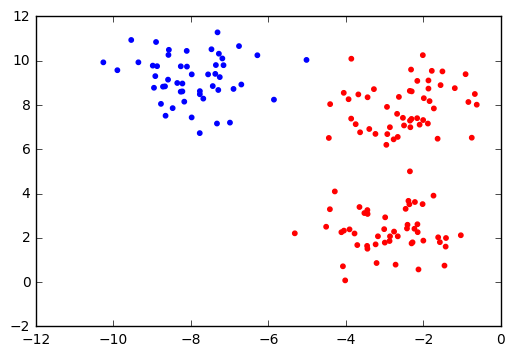

In [90]:
plt.scatter(X[:, 0], X[:, 1], color=colors[clusters1].tolist(), s=10)

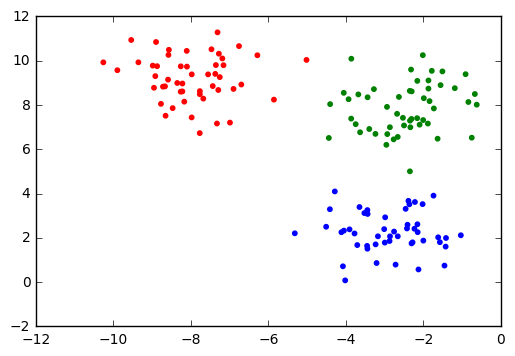

In [84]:
plt.scatter(X[:, 0], X[:, 1], color=colors[clusters2].tolist(), s=10)